In [1]:
import pandas as pd
import numpy as np
import sys

version = ".".join(map(str, sys.version_info[:3]))
print('python version ', version)
print('numpy version ', np.__version__)
print('pandas version ',pd.__version__)

python version  3.6.2
numpy version  1.13.1
pandas version  0.20.3


In [2]:
import geopandas as gpd
import pysal

print("geopandas version ", gpd.__version__)

geopandas version  0.2.1


In [5]:
import matplotlib.pyplot as plt

In [6]:
# Tell the kernel that we want the plots to be in this notebook
# and not in an external window
%matplotlib inline

In [11]:
filename = '../../data/census/CBP/cbp15co.txt'
cbp_county_2015_df = pd.read_csv(filename,
                                 dtype={'FIPSTATE': str,
                                        'FIPSCTY': str})
print('rows, columns ', cbp_county_2015_df.shape)
cbp_county_2015_df.head()

rows, columns  (2126601, 26)


,FIPSTATE,FIPSCTY,NAICS,EMPFLAG,EMP_NF,EMP,QP1_NF,QP1,AP_NF,AP,...,N100_249,N250_499,N500_999,N1000,N1000_1,N1000_2,N1000_3,N1000_4,CENSTATE,CENCTY
0,01,001,------,NaN,G,10454,G,76437,G,321433,...,6,2,1,0,0,0,0,0,63,1
1,01,001,11----,NaN,H,70,H,790,H,3566,...,0,0,0,0,0,0,0,0,63,1
2,01,001,113///,NaN,H,70,H,790,H,3551,...,0,0,0,0,0,0,0,0,63,1
3,01,001,1133//,NaN,H,70,H,790,H,3551,...,0,0,0,0,0,0,0,0,63,1
4,01,001,11331/,NaN,H,70,H,790,H,3551,...,0,0,0,0,0,0,0,0,63,1


In [12]:
geoids = [state + county for state, county in zip(cbp_county_2015_df['FIPSTATE'], cbp_county_2015_df['FIPSCTY'])]
cbp_county_2015_df['GEOID'] = geoids

In [13]:
ecom_df = cbp_county_2015_df[cbp_county_2015_df['NAICS'] == '454111']
ecom_df.shape

(1824, 27)

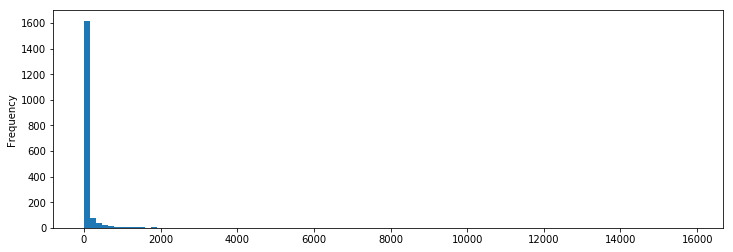

In [14]:
ecom_df['EMP'].plot.hist(bins=100, figsize=(12,4))

In [15]:
ecom_co_gt39_df = ecom_df[ecom_df.EMP > 39]
ecom_co_gt39_df.shape

(441, 27)

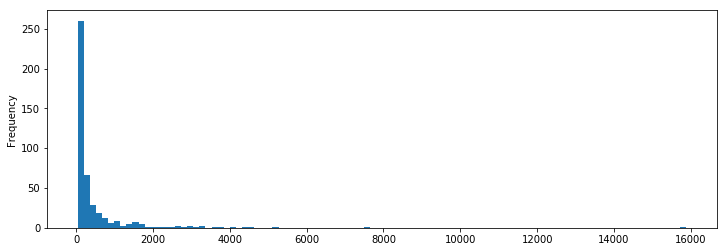

In [16]:
ecom_co_gt39_df['EMP'].plot.hist(bins=100, figsize=(12,4))

In [17]:
cb_2015_us_county = '../../data/shapefiles/cb_2015_us_county_20m/cb_2015_us_county_20m.shp'
us_county_df = gpd.read_file(cb_2015_us_county)
us_county_df.head(3)

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry
0,0500000US20175,1655865960,2777350,175,00485050,20175,06,Seward,20,"POLYGON ((-101.067904 37.38777899999999, -100...."
1,0500000US28141,1098939230,52359814,141,00695791,28141,06,Tishomingo,28,"POLYGON ((-88.36353026853919 34.9957467517971,..."
2,0500000US36101,3601566799,34993606,101,00974148,36101,06,Steuben,36,"POLYGON ((-77.72296399999999 42.471216, -77.72..."


In [18]:
cb_2015_us_state = '../../data/shapefiles/cb_2015_us_state_20m/cb_2015_us_state_20m.shp'
us_state_df = gpd.read_file(cb_2015_us_state)
us_state_df.head(3)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US48,676634395761,19027462392,48,00,Texas,48,01779801,TX,"POLYGON ((-106.623445 31.914034, -106.630114 3..."
1,0400000US06,403488955894,20477992907,06,00,California,06,01779778,CA,"(POLYGON ((-118.593969 33.467198, -118.484785 ..."
2,0400000US21,102266253024,2389483091,21,00,Kentucky,21,01779786,KY,"POLYGON ((-89.544434 36.57451, -89.47934599999..."


In [19]:
cb_2015_us_cbsa = '../../data/shapefiles/cb_2015_us_cbsa_20m/cb_2015_us_cbsa_20m.shp'
us_cbsa_df = gpd.read_file(cb_2015_us_cbsa)
us_cbsa_df.head(3)

,AFFGEOID,ALAND,AWATER,CBSAFP,CSAFP,GEOID,LSAD,NAME,geometry
0,310M200US12660,2152007753,45296336,12660,357,12660,M2,"Baraboo, WI","POLYGON ((-90.312404 43.640988, -89.785809 43...."
1,310M200US10420,2331619578,62018442,10420,184,10420,M1,"Akron, OH","POLYGON ((-81.68698999999999 41.135956, -81.68..."
2,310M200US26540,991056505,13133894,26540,258,26540,M2,"Huntington, IN","POLYGON ((-85.64384099999999 41.002305, -85.33..."


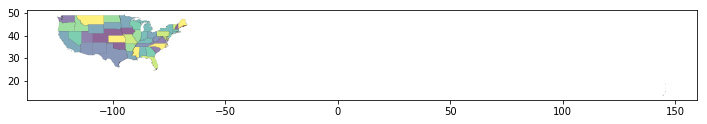

In [49]:
us_state_df.plot(linewidth=0.06,
                 alpha=0.6,
                 figsize=(12, 6))

In [28]:
fips_states_outside = ('02','15','72','66',
                       '78','60','69','64',
                       '68','70','74',
                       '81', '84', '86', '87',
                       '89', '71', '76', '95',
                       '79')
#us_cstate_df = us_state_df[us_state_df['GEOID'] in fips_states_outside]

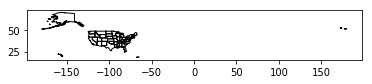

In [21]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
us_state_df.plot(ax=ax, color="#EBEBEB", facecolor="white")